In [1]:
import pandas as pd
import numpy as np

import pycountry
# visualisation
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from scipy.stats import norm
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool,Select
import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import dash_core_components as dcc
from dash import html
from dash.dependencies import Input, Output


/var/folders/py/4cct40495x36bqlv8mh9q3m00000gn/T/ipykernel_16590/3770438752.py:20: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


### Wholesale Price Index (Excl VAT) for Building and Construction Materials

In [2]:
# construction market indices
df_wpm=pd.read_csv('WPM28.20230512223723.csv')
df_wpm.head()

,STATISTIC,Statistic Label,TLIST(M1),Month,C01409V03262,Type of Material,UNIT,VALUE
0,WPM28C01,Wholesale Price Index (Excl VAT) for Building ...,201501,2015 January,-,Materials,Base 2015=100,99.2
1,WPM28C01,Wholesale Price Index (Excl VAT) for Building ...,201501,2015 January,601,"Stone, sand and gravel",Base 2015=100,95.7
2,WPM28C01,Wholesale Price Index (Excl VAT) for Building ...,201501,2015 January,60161,Sand and gravel,Base 2015=100,98.0
3,WPM28C01,Wholesale Price Index (Excl VAT) for Building ...,201501,2015 January,60162,Stone,Base 2015=100,95.3
4,WPM28C01,Wholesale Price Index (Excl VAT) for Building ...,201501,2015 January,611,Cement,Base 2015=100,100.0


In [3]:
df_wpm["Type of Material"].value_counts()

Materials                                               297
Stone, sand and gravel                                  297
Bituminous macadam, asphalt and bituminous emulsions    297
Bituminous macadam and asphalt                          297
Bituminous emulsions                                    297
Electrical fittings                                     297
Lighting equipment                                      297
Protection and communication equipment                  297
All other materials                                     297
Plumbing materials including sanitary ware              297
HVAC (heating and ventilation equipment)                297
Insulating materials                                    297
Pipes and fittings                                      297
PVC pipes and fittings                                  297
Copper pipes and fittings                               297
Plaster                                                 297
Paints, oils and varnishes              

In [4]:
len(df_wpm["Type of Material"].unique())

40

In [5]:
df_wpm.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(M1)', 'Month', 'C01409V03262',
       'Type of Material', 'UNIT', 'VALUE'],
      dtype='object')

In [6]:
cols=["Date",'Month',"Material","Wholesale_Price_Index"]
df_wpm=df_wpm[['TLIST(M1)','Month','Type of Material','VALUE']]
df_wpm.columns=cols
df_wpm.head()

,Date,Month,Material,Wholesale_Price_Index
0,201501,2015 January,Materials,99.2
1,201501,2015 January,"Stone, sand and gravel",95.7
2,201501,2015 January,Sand and gravel,98.0
3,201501,2015 January,Stone,95.3
4,201501,2015 January,Cement,100.0


In [7]:
df_wpm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11880 entries, 0 to 11879
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   11880 non-null  int64  
 1   Month                  11880 non-null  object 
 2   Material               11880 non-null  object 
 3   Wholesale_Price_Index  11348 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 371.4+ KB


In [8]:
df_wpm['Date'] =df_wpm['Date'].astype(str)

# Extract year, month, and quarter into separate columns
df_wpm['Year'] = df_wpm['Date'].str[:4].astype(int)
df_wpm['Month'] = df_wpm['Date'].str[-2:].astype(int)
df_wpm['Quarter'] = pd.to_datetime(df_wpm['Date'], format='%Y%m').dt.quarter.astype(int)
df_wpm['Wholesale_Price_Index']=df_wpm['Wholesale_Price_Index'].astype(float)
df_wpm.head()


,Date,Month,Material,Wholesale_Price_Index,Year,Quarter
0,201501,1,Materials,99.2,2015,1
1,201501,1,"Stone, sand and gravel",95.7,2015,1
2,201501,1,Sand and gravel,98.0,2015,1
3,201501,1,Stone,95.3,2015,1
4,201501,1,Cement,100.0,2015,1


### New Dwelling Completion

In [9]:
df_ndc=pd.read_csv('NDQ06.csv')
df_ndc.head()

,STATISTIC,STATISTIC Label,TLIST(Q1),Quarter,C02342V02816,Type of House,C03789V04537,Local Authority,UNIT,VALUE
0,NDQ06,New Dwelling Completion,20111,2011Q1,06,Single house,2ae19629-1434-13a3-e055-000000000001,Cork City Council,Number,8
1,NDQ06,New Dwelling Completion,20111,2011Q1,06,Single house,2ae19629-14a2-13a3-e055-000000000001,Clare County Council,Number,45
2,NDQ06,New Dwelling Completion,20111,2011Q1,06,Single house,2ae19629-149d-13a3-e055-000000000001,Cavan County Council,Number,21
3,NDQ06,New Dwelling Completion,20111,2011Q1,06,Single house,2ae19629-14a3-13a3-e055-000000000001,Cork County Council,Number,145
4,NDQ06,New Dwelling Completion,20111,2011Q1,06,Single house,2ae19629-1492-13a3-e055-000000000001,Carlow County Council,Number,17


In [10]:
df_ndc.groupby(['STATISTIC Label'])['STATISTIC Label'].count()

STATISTIC Label
New Dwelling Completion    6272
Name: STATISTIC Label, dtype: int64

In [11]:
df_ndc.columns

Index(['STATISTIC', 'STATISTIC Label', 'TLIST(Q1)', 'Quarter', 'C02342V02816',
       'Type of House', 'C03789V04537', 'Local Authority', 'UNIT', 'VALUE'],
      dtype='object')

In [12]:
df_ndc=df_ndc[['TLIST(Q1)', 'Quarter',
       'Type of House','Local Authority','VALUE']]
cols_ndc=['Date','Quarter','House_Type','Local_Authority','House_Count']
df_ndc.columns=cols_ndc
df_ndc.head()

,Date,Quarter,House_Type,Local_Authority,House_Count
0,20111,2011Q1,Single house,Cork City Council,8
1,20111,2011Q1,Single house,Clare County Council,45
2,20111,2011Q1,Single house,Cavan County Council,21
3,20111,2011Q1,Single house,Cork County Council,145
4,20111,2011Q1,Single house,Carlow County Council,17


In [13]:
df_ndc['Date'] =df_ndc['Date'].astype(str)

# Extract year, month, and quarter into separate columns
df_ndc['Year'] = df_ndc['Date'].str[:4].astype(int)
df_ndc['Quarter'] = df_ndc['Date'].str[-1:].astype(int)
df_ndc['House_Count']=df_ndc['House_Count'].astype(int)
df_ndc.head()

,Date,Quarter,House_Type,Local_Authority,House_Count,Year
0,20111,1,Single house,Cork City Council,8,2011
1,20111,1,Single house,Clare County Council,45,2011
2,20111,1,Single house,Cavan County Council,21,2011
3,20111,1,Single house,Cork County Council,145,2011
4,20111,1,Single house,Carlow County Council,17,2011


In [14]:
df_ndc.groupby(['Local_Authority'])['Local_Authority'].count()

Local_Authority
Carlow County Council                    196
Cavan County Council                     196
Clare County Council                     196
Cork City Council                        196
Cork County Council                      196
Donegal County Council                   196
Dublin City Council                      196
Dún Laoghaire Rathdown County Council    196
Fingal County Council                    196
Galway City Council                      196
Galway County Council                    196
Ireland                                  196
Kerry County Council                     196
Kildare County Council                   196
Kilkenny County Council                  196
Laois County Council                     196
Leitrim County Council                   196
Limerick City & County Council           196
Longford County Council                  196
Louth County Council                     196
Mayo County Council                      196
Meath County Council                   

In [15]:
df_ndc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             6272 non-null   object
 1   Quarter          6272 non-null   int64 
 2   House_Type       6272 non-null   object
 3   Local_Authority  6272 non-null   object
 4   House_Count      6272 non-null   int64 
 5   Year             6272 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 294.1+ KB


In [16]:
df_ndc=df_ndc[df_ndc['Local_Authority']=='Ireland']

df_ndc.head()

,Date,Quarter,House_Type,Local_Authority,House_Count,Year
31,20111,1,Single house,Ireland,1156,2011
63,20111,1,Scheme house,Ireland,447,2011
95,20111,1,Apartment,Ireland,272,2011
127,20111,1,All house types,Ireland,1875,2011
159,20112,2,Single house,Ireland,1194,2011


### world bank datasets


In [17]:
df_wb=pd.read_csv('a45487f0-09b6-40b6-9f3c-8f02629a613a_Data.csv')
df_wb

,Country Name,Country Code,Series Name,Series Code,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Ireland,IRL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1.125690e+00,8.649351e+00,2.437045e+01,2.006654e+00,9.005342e+00,8.527541e+00,5.440937e+00,6.184538e+00,1.358825e+01,..
1,Ireland,IRL,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,1.050319e+00,5.423289e-02,8.386291e+00,7.278224e-01,1.094922e+00,1.075700e+00,3.571836e+00,-1.565279e+00,6.576432e-01,..
2,Ireland,IRL,Net migration,SM.POP.NETM,-1.201500e+04,7.140000e+02,1.313000e+04,1.897800e+04,2.920000e+04,3.364700e+04,2.911300e+04,1.532000e+04,1.532000e+04,9999
3,Ireland,IRL,Population growth (annual %),SP.POP.GROW,5.265562e-01,7.310014e-01,9.448453e-01,1.128834e+00,1.088676e+00,1.238875e+00,1.367627e+00,1.029111e+00,9.538981e-01,..
4,Ireland,IRL,"Population, total",SP.POP.TOTL,4.623816e+06,4.657740e+06,4.701957e+06,4.755335e+06,4.807388e+06,4.867316e+06,4.934340e+06,4.985382e+06,5.033165e+06,..
5,Ireland,IRL,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1.490000e+01,1.440000e+01,1.390000e+01,1.340000e+01,1.290000e+01,1.250000e+01,1.200000e+01,1.120000e+01,1.160000e+01,..
6,Ireland,IRL,Gross national expenditure (% of GDP),NE.DAB.TOTL.ZS,8.089563e+01,8.149532e+01,7.125103e+01,8.411086e+01,7.869940e+01,7.118307e+01,9.622984e+01,8.140651e+01,6.060716e+01,..
7,Ireland,IRL,Gross savings (% of GDP),NY.GNS.ICTR.ZS,2.079017e+01,2.391246e+01,3.024582e+01,3.362272e+01,3.435825e+01,3.377500e+01,3.539443e+01,3.650919e+01,3.895320e+01,..
8,Ireland,IRL,"Industry (including construction), value added...",NV.IND.TOTL.KD.ZG,-2.657287e+00,1.033226e+01,7.012389e+01,-1.267340e+00,4.234452e+00,1.082557e+01,2.315378e+00,2.034074e+01,2.032766e+01,..
9,Ireland,IRL,"Population ages 0-14, total",SP.POP.0014.TO,9.958730e+05,1.000254e+06,1.004394e+06,1.008135e+06,1.009142e+06,1.009790e+06,1.009477e+06,1.005941e+06,1.002263e+06,..


In [18]:
df_wb.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]',
       '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]',
       '2021 [YR2021]', '2022 [YR2022]'],
      dtype='object')

In [19]:
cols_wb=['Country_Name', 'Country_Code', 'Series_Name', 'Series_Code','2013', '2014', '2015', '2016','2017', '2018', '2019', '2020','2021', '2022']
df_wb.columns=cols_wb
df_wb=df_wb[['Series_Name','2013', '2014', '2015', '2016','2017', '2018', '2019', '2020','2021', '2022']]
df_wb.head()

,Series_Name,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,GDP growth (annual %),1.125690e+00,8.649351e+00,2.437045e+01,2.006654e+00,9.005342e+00,8.527541e+00,5.440937e+00,6.184538e+00,1.358825e+01,..
1,"Inflation, GDP deflator (annual %)",1.050319e+00,5.423289e-02,8.386291e+00,7.278224e-01,1.094922e+00,1.075700e+00,3.571836e+00,-1.565279e+00,6.576432e-01,..
2,Net migration,-1.201500e+04,7.140000e+02,1.313000e+04,1.897800e+04,2.920000e+04,3.364700e+04,2.911300e+04,1.532000e+04,1.532000e+04,9999
3,Population growth (annual %),5.265562e-01,7.310014e-01,9.448453e-01,1.128834e+00,1.088676e+00,1.238875e+00,1.367627e+00,1.029111e+00,9.538981e-01,..
4,"Population, total",4.623816e+06,4.657740e+06,4.701957e+06,4.755335e+06,4.807388e+06,4.867316e+06,4.934340e+06,4.985382e+06,5.033165e+06,..


In [20]:
# Melt the DataFrame to unpivot the years
df_melt = pd.melt(df_wb, id_vars='Series_Name', var_name='Year', value_name='Value')

# Pivot the melted DataFrame
df_pivot = df_melt.pivot(index='Year', columns='Series_Name', values='Value')

# Reset the index
df_pivot = df_pivot.reset_index()
df_pivot

Series_Name,Year,"Birth rate, crude (per 1,000 people)",GDP growth (annual %),Gross national expenditure (% of GDP),Gross savings (% of GDP),"Industry (including construction), value added (annual % growth)","Inflation, GDP deflator (annual %)",Net migration,"Population ages 0-14, total","Population ages 15-64, total","Population ages 65 and above, total",Population growth (annual %),"Population, total",Rural population,Urban population
0,2013,14.9,1.12569,80.895626,20.790172,-2.657287,1.050319,-12015.0,995873.0,3047390.0,580552.0,0.526556,4623816.0,1750530.0,2873286.0
1,2014,14.4,8.649351,81.495316,23.912461,10.332259,0.054233,714.0,1000254.0,3058075.0,599411.0,0.731001,4657740.0,1754105.0,2903635.0
2,2015,13.9,24.370445,71.251034,30.245823,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0
3,2016,13.4,2.006654,84.110857,33.622721,-1.26734,0.727822,18978.0,1008135.0,3110739.0,636462.0,1.128834,4755335.0,1771980.0,2983355.0
4,2017,12.9,9.005342,78.699402,34.358252,4.234452,1.094922,29200.0,1009142.0,3141774.0,656472.0,1.088676,4807388.0,1781281.0,3026107.0
5,2018,12.5,8.527541,71.183072,33.775003,10.825575,1.0757,33647.0,1009790.0,3178909.0,678617.0,1.238875,4867316.0,1792632.0,3074684.0
6,2019,12.0,5.440937,96.229836,35.394434,2.315378,3.571836,29113.0,1009477.0,3222077.0,702786.0,1.367627,4934340.0,1805722.0,3128618.0
7,2020,11.2,6.184538,81.406506,36.509194,20.340745,-1.565279,15320.0,1005941.0,3254350.0,725091.0,1.029111,4985382.0,1812037.0,3173345.0
8,2021,11.6,13.588247,60.607163,38.953199,20.327664,0.657643,15320.0,1002263.0,3284531.0,746371.0,0.953898,5033165.0,1816369.0,3216796.0
9,2022,..,..,..,..,..,..,9999,..,..,..,..,..,..,..


In [21]:
df_pivot.drop(9, inplace=True)
df_pivot

Series_Name,Year,"Birth rate, crude (per 1,000 people)",GDP growth (annual %),Gross national expenditure (% of GDP),Gross savings (% of GDP),"Industry (including construction), value added (annual % growth)","Inflation, GDP deflator (annual %)",Net migration,"Population ages 0-14, total","Population ages 15-64, total","Population ages 65 and above, total",Population growth (annual %),"Population, total",Rural population,Urban population
0,2013,14.9,1.12569,80.895626,20.790172,-2.657287,1.050319,-12015.0,995873.0,3047390.0,580552.0,0.526556,4623816.0,1750530.0,2873286.0
1,2014,14.4,8.649351,81.495316,23.912461,10.332259,0.054233,714.0,1000254.0,3058075.0,599411.0,0.731001,4657740.0,1754105.0,2903635.0
2,2015,13.9,24.370445,71.251034,30.245823,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0
3,2016,13.4,2.006654,84.110857,33.622721,-1.26734,0.727822,18978.0,1008135.0,3110739.0,636462.0,1.128834,4755335.0,1771980.0,2983355.0
4,2017,12.9,9.005342,78.699402,34.358252,4.234452,1.094922,29200.0,1009142.0,3141774.0,656472.0,1.088676,4807388.0,1781281.0,3026107.0
5,2018,12.5,8.527541,71.183072,33.775003,10.825575,1.0757,33647.0,1009790.0,3178909.0,678617.0,1.238875,4867316.0,1792632.0,3074684.0
6,2019,12.0,5.440937,96.229836,35.394434,2.315378,3.571836,29113.0,1009477.0,3222077.0,702786.0,1.367627,4934340.0,1805722.0,3128618.0
7,2020,11.2,6.184538,81.406506,36.509194,20.340745,-1.565279,15320.0,1005941.0,3254350.0,725091.0,1.029111,4985382.0,1812037.0,3173345.0
8,2021,11.6,13.588247,60.607163,38.953199,20.327664,0.657643,15320.0,1002263.0,3284531.0,746371.0,0.953898,5033165.0,1816369.0,3216796.0


In [22]:
df_pivot.columns

Index(['Year', 'Birth rate, crude (per 1,000 people)', 'GDP growth (annual %)',
       'Gross national expenditure (% of GDP)', 'Gross savings (% of GDP)',
       'Industry (including construction), value added (annual % growth)',
       'Inflation, GDP deflator (annual %)', 'Net migration',
       'Population ages 0-14, total', 'Population ages 15-64, total',
       'Population ages 65 and above, total', 'Population growth (annual %)',
       'Population, total', 'Rural population', 'Urban population'],
      dtype='object', name='Series_Name')

In [23]:
cols_new=['Year','Birth rate', 'GDP growth', 'Gross_National_Expenditure', 'Gross_Savings', 'Industry', 'Inflation', 'Net_Migration', ' Population_0-14', 
            'Population _5-64', 'Population_above_65', 'Population growth', 'Population', 'Rural population', 'Urban population']
df_pivot.columns=cols_new
df_pivot[cols_new]=df_pivot[cols_new].astype(float)
df_pivot['Year']=df_pivot['Year'].astype(int)

In [24]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        9 non-null      int64  
 1   Birth rate                  9 non-null      float64
 2   GDP growth                  9 non-null      float64
 3   Gross_National_Expenditure  9 non-null      float64
 4   Gross_Savings               9 non-null      float64
 5   Industry                    9 non-null      float64
 6   Inflation                   9 non-null      float64
 7   Net_Migration               9 non-null      float64
 8    Population_0-14            9 non-null      float64
 9   Population _5-64            9 non-null      float64
 10  Population_above_65         9 non-null      float64
 11  Population growth           9 non-null      float64
 12  Population                  9 non-null      float64
 13  Rural population            9 non-null 

### BEQ04 - Indices of Total Production in Building and Construction Sector (Base 2015=100)
#### https://data.gov.ie/dataset/beq04-indices-of-total-production-in-building-and-construction-sector-base-2015100?package_type=dataset

In [25]:
df_bc=pd.read_csv('BEQ04.20230512223829.csv')
df_bc.head()

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02402V02895,Type of Building and Construction,UNIT,VALUE
0,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,-,All building and construction,Base 2015=100,143.514977
1,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,11,Building (excluding civil engineering),Base 2015=100,182.795802
2,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,111,Residential building,Base 2015=100,279.281551
3,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,112,Non-residential building,Base 2015=100,115.359508
4,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,12,Civil engineering,Base 2015=100,60.438887


In [26]:
df_bc.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(Q1)', 'Quarter', 'C02402V02895',
       'Type of Building and Construction', 'UNIT', 'VALUE'],
      dtype='object')

In [27]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STATISTIC                          1840 non-null   object 
 1   Statistic Label                    1840 non-null   object 
 2   TLIST(Q1)                          1840 non-null   int64  
 3   Quarter                            1840 non-null   object 
 4   C02402V02895                       1840 non-null   object 
 5   Type of Building and Construction  1840 non-null   object 
 6   UNIT                               1840 non-null   object 
 7   VALUE                              1840 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 115.1+ KB


In [28]:
cols_bc=['Date', 'Quarter','Type_of_Building_Construction','Indices_Building_Construction']
df_bc=df_bc[['TLIST(Q1)', 'Quarter', 'Type of Building and Construction','VALUE']]
df_bc.columns=cols_bc


In [29]:
df_bc['Date']=df_bc['Date'].astype(str)
df_bc['Year'] = df_bc['Date'].str[:4].astype(int)
df_bc['Quarter'] = df_bc['Date'].str[-1:].astype(int)
df_bc['Indices_Building_Construction']=df_bc['Indices_Building_Construction'].astype(float)
df_bc.drop('Date',axis=1,inplace=True)
df_bc.head()

,Quarter,Type_of_Building_Construction,Indices_Building_Construction,Year
0,1,All building and construction,143.514977,2000
1,1,Building (excluding civil engineering),182.795802,2000
2,1,Residential building,279.281551,2000
3,1,Non-residential building,115.359508,2000
4,1,Civil engineering,60.438887,2000


### europen uninion construction datasets for comparing
https://ec.europa.eu/eurostat/databrowser/view/STS_COPI_Q__custom_6244165/default/table?lang=en

In [30]:
df_eu_conuntries=pd.read_csv("sts_copi_q__custom_6244165_page_linear.csv")
df_eu_conuntries.head()

,DATAFLOW,LAST UPDATE,freq,indic_bt,cpa2_1,s_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,2002-Q1,85.2,s
1,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,2002-Q2,85.7,s
2,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,2002-Q3,86.6,s
3,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,2002-Q4,87.5,s
4,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,2003-Q1,86.7,s


In [31]:
df_eu_conuntries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4089 entries, 0 to 4088
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     4089 non-null   object 
 1   LAST UPDATE  4089 non-null   object 
 2   freq         4089 non-null   object 
 3   indic_bt     4089 non-null   object 
 4   cpa2_1       4089 non-null   object 
 5   s_adj        4089 non-null   object 
 6   unit         4089 non-null   object 
 7   geo          4089 non-null   object 
 8   TIME_PERIOD  4089 non-null   object 
 9   OBS_VALUE    4088 non-null   float64
 10  OBS_FLAG     2233 non-null   object 
dtypes: float64(1), object(10)
memory usage: 351.5+ KB


In [32]:
df_eu_conuntries['TIME_PERIOD']=df_eu_conuntries['TIME_PERIOD'].astype(str)
df_eu_conuntries['Year'] = df_eu_conuntries['TIME_PERIOD'].str[:4].astype(int)
df_eu_conuntries['Quarter'] = df_eu_conuntries['TIME_PERIOD'].str[-1:].astype(int)
df_eu_conuntries['OBS_VALUE']=df_eu_conuntries['OBS_VALUE'].astype(float)
df_eu_conuntries.drop('TIME_PERIOD',axis=1,inplace=True)
df_eu_conuntries.head()

,DATAFLOW,LAST UPDATE,freq,indic_bt,cpa2_1,s_adj,unit,geo,OBS_VALUE,OBS_FLAG,Year,Quarter
0,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,85.2,s,2002,1
1,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,85.7,s,2002,2
2,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,86.6,s,2002,3
3,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,87.5,s,2002,4
4,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,86.7,s,2003,1


### Merge datasets


In [33]:
df_wb

,Series_Name,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,GDP growth (annual %),1.125690e+00,8.649351e+00,2.437045e+01,2.006654e+00,9.005342e+00,8.527541e+00,5.440937e+00,6.184538e+00,1.358825e+01,..
1,"Inflation, GDP deflator (annual %)",1.050319e+00,5.423289e-02,8.386291e+00,7.278224e-01,1.094922e+00,1.075700e+00,3.571836e+00,-1.565279e+00,6.576432e-01,..
2,Net migration,-1.201500e+04,7.140000e+02,1.313000e+04,1.897800e+04,2.920000e+04,3.364700e+04,2.911300e+04,1.532000e+04,1.532000e+04,9999
3,Population growth (annual %),5.265562e-01,7.310014e-01,9.448453e-01,1.128834e+00,1.088676e+00,1.238875e+00,1.367627e+00,1.029111e+00,9.538981e-01,..
4,"Population, total",4.623816e+06,4.657740e+06,4.701957e+06,4.755335e+06,4.807388e+06,4.867316e+06,4.934340e+06,4.985382e+06,5.033165e+06,..
5,"Birth rate, crude (per 1,000 people)",1.490000e+01,1.440000e+01,1.390000e+01,1.340000e+01,1.290000e+01,1.250000e+01,1.200000e+01,1.120000e+01,1.160000e+01,..
6,Gross national expenditure (% of GDP),8.089563e+01,8.149532e+01,7.125103e+01,8.411086e+01,7.869940e+01,7.118307e+01,9.622984e+01,8.140651e+01,6.060716e+01,..
7,Gross savings (% of GDP),2.079017e+01,2.391246e+01,3.024582e+01,3.362272e+01,3.435825e+01,3.377500e+01,3.539443e+01,3.650919e+01,3.895320e+01,..
8,"Industry (including construction), value added...",-2.657287e+00,1.033226e+01,7.012389e+01,-1.267340e+00,4.234452e+00,1.082557e+01,2.315378e+00,2.034074e+01,2.032766e+01,..
9,"Population ages 0-14, total",9.958730e+05,1.000254e+06,1.004394e+06,1.008135e+06,1.009142e+06,1.009790e+06,1.009477e+06,1.005941e+06,1.002263e+06,..


In [34]:
# create a final df with merging only Iriland datasets
df_final=df_wpm.merge(df_ndc,on=['Year','Quarter'])
df_final.head()

,Date_x,Month,Material,Wholesale_Price_Index,Year,Quarter,Date_y,House_Type,Local_Authority,House_Count
0,201501,1,Materials,99.2,2015,1,20151,Single house,Ireland,659
1,201501,1,Materials,99.2,2015,1,20151,Scheme house,Ireland,606
2,201501,1,Materials,99.2,2015,1,20151,Apartment,Ireland,106
3,201501,1,Materials,99.2,2015,1,20151,All house types,Ireland,1371
4,201501,1,"Stone, sand and gravel",95.7,2015,1,20151,Single house,Ireland,659


In [35]:
df_final=df_final.merge(df_bc,on=['Year','Quarter'])
df_final.head()

,Date_x,Month,Material,Wholesale_Price_Index,Year,Quarter,Date_y,House_Type,Local_Authority,House_Count,Type_of_Building_Construction,Indices_Building_Construction
0,201501,1,Materials,99.2,2015,1,20151,Single house,Ireland,659,All building and construction,86.994370
1,201501,1,Materials,99.2,2015,1,20151,Single house,Ireland,659,Building (excluding civil engineering),87.219016
2,201501,1,Materials,99.2,2015,1,20151,Single house,Ireland,659,Residential building,85.585237
3,201501,1,Materials,99.2,2015,1,20151,Single house,Ireland,659,Non-residential building,87.472137
4,201501,1,Materials,99.2,2015,1,20151,Single house,Ireland,659,Civil engineering,85.970980


In [36]:
df_final=df_final.merge(df_pivot,on='Year')
df_final.head()

,Date_x,Month,Material,Wholesale_Price_Index,Year,Quarter,Date_y,House_Type,Local_Authority,House_Count,...,Industry,Inflation,Net_Migration,Population_0-14,Population _5-64,Population_above_65,Population growth,Population,Rural population,Urban population
0,201501,1,Materials,99.2,2015,1,20151,Single house,Ireland,659,...,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0
1,201501,1,Materials,99.2,2015,1,20151,Single house,Ireland,659,...,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0
2,201501,1,Materials,99.2,2015,1,20151,Single house,Ireland,659,...,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0
3,201501,1,Materials,99.2,2015,1,20151,Single house,Ireland,659,...,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0
4,201501,1,Materials,99.2,2015,1,20151,Single house,Ireland,659,...,70.123892,8.386291,13130.0,1004394.0,3080857.0,616706.0,0.944845,4701957.0,1761447.0,2940510.0


In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806400 entries, 0 to 806399
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date_x                         806400 non-null  object 
 1   Month                          806400 non-null  int64  
 2   Material                       806400 non-null  object 
 3   Wholesale_Price_Index          764800 non-null  float64
 4   Year                           806400 non-null  int64  
 5   Quarter                        806400 non-null  int64  
 6   Date_y                         806400 non-null  object 
 7   House_Type                     806400 non-null  object 
 8   Local_Authority                806400 non-null  object 
 9   House_Count                    806400 non-null  int64  
 10  Type_of_Building_Construction  806400 non-null  object 
 11  Indices_Building_Construction  806400 non-null  float64
 12  Birth rate                    

### Comparing EU datasets
* Construction producer prices or costs, new residential buildings 
* EU data sets include Europen Union countries 
* Datasets illustrates index quarterly
* Comparisons will be made between Ireland and other European Union countries using the following features;
 - geo (categorical feature) : country codes 
 - obs_value (numerical feature) : Construction producer prices or costs index 
 - year
 - quarter

####  https://pypi.org/project/pycountry/
* country codes convert from alpha 2 to apha-3

In [38]:
df_eu_conuntries.head()

,DATAFLOW,LAST UPDATE,freq,indic_bt,cpa2_1,s_adj,unit,geo,OBS_VALUE,OBS_FLAG,Year,Quarter
0,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,85.2,s,2002,1
1,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,85.7,s,2002,2
2,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,86.6,s,2002,3
3,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,87.5,s,2002,4
4,ESTAT:STS_COPI_Q(1.0),17/05/23 11:00:00,Q,CSTO,CPA_F41001_X_410014,NSA,I15,AL,86.7,s,2003,1


In [39]:
df_eu_conuntries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4089 entries, 0 to 4088
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     4089 non-null   object 
 1   LAST UPDATE  4089 non-null   object 
 2   freq         4089 non-null   object 
 3   indic_bt     4089 non-null   object 
 4   cpa2_1       4089 non-null   object 
 5   s_adj        4089 non-null   object 
 6   unit         4089 non-null   object 
 7   geo          4089 non-null   object 
 8   OBS_VALUE    4088 non-null   float64
 9   OBS_FLAG     2233 non-null   object 
 10  Year         4089 non-null   int64  
 11  Quarter      4089 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 383.5+ KB


In [40]:
df_eu_conuntries_new=df_eu_conuntries[['geo','OBS_VALUE','Year','Quarter']]
df_eu_conuntries_new.describe(include='all')

,geo,OBS_VALUE,Year,Quarter
count,4089,4088.000000,4089.000000,4089.000000
unique,38,NaN,NaN,NaN
top,FR,NaN,NaN,NaN
freq,277,NaN,NaN,NaN
mean,NaN,88.233317,2006.926877,2.496209
std,NaN,32.213649,11.998421,1.119585
min,NaN,6.000000,1953.000000,1.000000
25%,NaN,71.700000,2002.000000,1.000000
50%,NaN,93.700000,2009.000000,2.000000
75%,NaN,102.000000,2016.000000,3.000000


In [41]:
# convert alpha-2 code to alpha-3 code
df_eu_conuntries_new['geo_3'] = df_eu_conuntries_new['geo'].apply(lambda x: pycountry.countries.get(alpha_2=x).alpha_3 if pycountry.countries.get(alpha_2=x) else None)

df_eu_conuntries_new.head()

/var/folders/py/4cct40495x36bqlv8mh9q3m00000gn/T/ipykernel_16590/2530568235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu_conuntries_new['geo_3'] = df_eu_conuntries_new['geo'].apply(lambda x: pycountry.countries.get(alpha_2=x).alpha_3 if pycountry.countries.get(alpha_2=x) else None)


,geo,OBS_VALUE,Year,Quarter,geo_3
0,AL,85.2,2002,1,ALB
1,AL,85.7,2002,2,ALB
2,AL,86.6,2002,3,ALB
3,AL,87.5,2002,4,ALB
4,AL,86.7,2003,1,ALB


* OBS_VALUE's statistics show that there is a significant difference between min and max values and the feature's mean also shows it is the left skew and it shows that majority of outliers mean greater than 3rd quartile.

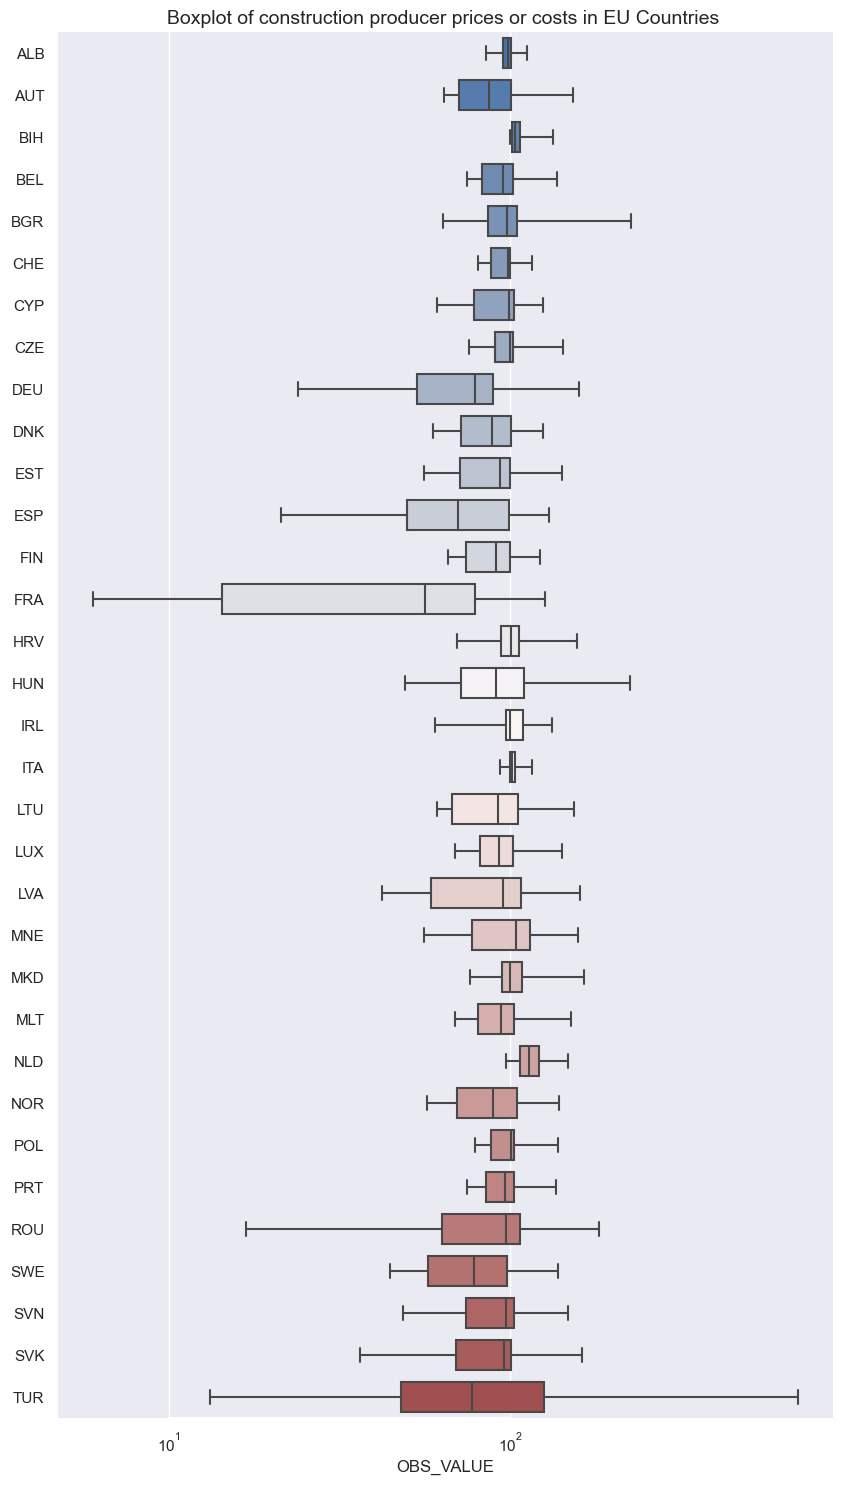

In [42]:
#boxplot for loking index in general


# https://seaborn.pydata.org/examples/horizontal_boxplot.html

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 18))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="OBS_VALUE", y="geo_3", data=df_eu_conuntries_new,
            whis=[0, 100], width=0.7, palette="vlag")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set_title("Boxplot of construction producer prices or costs in EU Countries ",fontsize=14)
#plt.xticks(rotation='vertical')
sns.despine(trim=True, left=True)



### geo


In [43]:
df_eu_conuntries_new.sort_values(by=["Year"],inplace=True)

/var/folders/py/4cct40495x36bqlv8mh9q3m00000gn/T/ipykernel_16590/2171315446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu_conuntries_new.sort_values(by=["Year"],inplace=True)


In [44]:
fig = px.choropleth(df_eu_conuntries_new, locations="geo_3",
                    color="OBS_VALUE", 
                    # column to add to hover information
                    animation_frame="Year", 
                    # column on which to animate
                    color_continuous_scale=px.colors.sequential.Reds,
                    locationmode='ISO-3')

                    
fig.update_layout(
    title_text = 'Changing the construction producer prices or costs in EU Countries by year',
    geo = dict(projection_type='natural earth', scope='europe') 
)
fig.show()

In [52]:
# lets look last 10 years
df_eu_last_10years=df_eu_conuntries_new[df_eu_conuntries_new['Year']>2012]

In [53]:
fig = px.choropleth(df_eu_last_10years, locations="geo_3",
                    color="OBS_VALUE", 
                    # column to add to hover information
                    #animation_frame="Year", 
                    # column on which to animate
                    color_continuous_scale=px.colors.sequential.Reds,
                    locationmode='ISO-3')

                    
fig.update_layout(
    title_text = 'Changing the construction producer prices or costs in EU Countries by year',
    geo = dict(projection_type='natural earth',scope='europe' ) 
)
fig.show()

### https://realpython.com/python-dash/ 


In [54]:
df_eu_conuntries_new['geo_3'].unique()

array(['FRA', 'DEU', None, 'ESP', 'SWE', 'AUT', 'FIN', 'SVK', 'DNK',
       'LTU', 'CHE', 'SVN', 'EST', 'CYP', 'HRV', 'HUN', 'BEL', 'POL',
       'PRT', 'NOR', 'ROU', 'IRL', 'LUX', 'LVA', 'MNE', 'MLT', 'TUR',
       'CZE', 'ALB', 'BGR', 'MKD', 'NLD', 'ITA', 'BIH'], dtype=object)

In [55]:
test_dict=df_eu_conuntries_new.sample(10).to_dict
print(test_dict)

<bound method DataFrame.to_dict of      geo  OBS_VALUE  Year  Quarter geo_3
3356  PT       76.5  2000        1   PRT
8     AL       90.1  2004        1   ALB
3006  MK      165.4  2022        4   MKD
3631  SE       95.6  2012        4   SWE
10    AL       92.7  2004        3   ALB
3918  TR       65.6  2008        1   TUR
406   CH       85.4  2000        3   CHE
3705  SI       81.4  2006        1   SVN
1008  DK      112.8  2021        4   DNK
1500  EL      108.4  2010        3  None>


In [60]:
# let see last 20 years and 10 countries
cnty_lst=['FRA', 'DEU', 'ESP', 'SWE','FIN', 'DNK','BEL','NOR', 'IRL','ITA']
df=df_eu_conuntries_new[(df_eu_conuntries_new['Year']>2002)&(df_eu_conuntries_new['geo_3'].isin(cnty_lst))]
df = df.dropna(subset=['geo_3'])
df.geo_3.unique()

array(['BEL', 'NOR', 'DNK', 'SWE', 'FRA', 'ESP', 'FIN', 'DEU', 'IRL',
       'ITA'], dtype=object)

In [61]:
# Create the Dash app
app = JupyterDash(__name__)

# Create the app layout
app.layout = html.Div([
    dcc.Graph(id='line-plot'),
    dcc.Dropdown(
        id='year-filter',
        options=[{'label': str(year), 'value': str(year)} for year in df['Year'].unique()],
        value=str(df['Year'].min()),
        clearable=False
    )
])

# Define the callback function
@app.callback(
    Output('line-plot', 'figure'),
    [Input('year-filter', 'value')]
)
def update_line_plot(selected_year):
    filtered_df = df[df['Year'] == int(selected_year)]
    fig = px.line(filtered_df, x='Quarter', y='OBS_VALUE', color='geo_3')
    fig.update_layout(
        xaxis_title='Quarter',
        yaxis_title='OBS_VALUE',
        title= 'Changing the construction producer prices or costs in EU Countries by year'
    )
    return fig

# Run the app
app.run_server(mode='inline',port=8078)

Dash is running on http://127.0.0.1:8078/



In [64]:
# Create the Dash app
app = JupyterDash(__name__)

# Create the app layout
app.layout = html.Div([
    dcc.Graph(id='line-plot'),
    dcc.Dropdown(
        id='q-filter',
        options=[{'label': str(q), 'value': str(q)} for q in df['Quarter'].unique()],
        value=str(df['Quarter'].min()),
        clearable=False
    )
])

# Define the callback function
@app.callback(
    Output('line-plot', 'figure'),
    [Input('q-filter', 'value')]
)
def update_line_plot(selected_q):
    filtered_df = df[df['Quarter'] == int(selected_q)]
    fig = px.line(filtered_df, x='Year', y='OBS_VALUE', color='geo_3')
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='OBS_VALUE',
        title= 'Changing the construction producer prices or costs in EU Countries by year'
    )
    return fig

# Run the app
app.run_server(mode='inline',port=8078)

Dash is running on http://127.0.0.1:8078/



### One-way ANOVA testing
* https://www.statology.org/one-way-anova/

* ($H_0$) hypothesis : Construction producer prices or costs are the same for European countries.
* ($H_A$) hypothesis : There is insufficient evidence that construction producer producer costs are similar.

In [65]:
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [67]:
# 4 European countries that are similar to Ireland in terms of population were selected.
# Ireland, Danmark, Finland,Slovakia and Croatia
# comparing the construction prices and costs
# Create a function to glimpse the data

def glimpse(df):
    print(f"{df.shape[0]} rows and {df.shape[1]} columns")
    display(df.head())
    display(df.tail())

glimpse(df_eu_conuntries_new)

4089 rows and 5 columns


,geo,OBS_VALUE,Year,Quarter,geo_3
1950,FR,6.2,1953,4,FRA
1952,FR,6.2,1954,2,FRA
1953,FR,6.0,1954,3,FRA
1954,FR,6.0,1954,4,FRA
1951,FR,6.1,1954,1,FRA


,geo,OBS_VALUE,Year,Quarter,geo_3
2411,HU,224.7,2023,1,HUN
3448,PT,136.5,2023,1,PRT
2557,IT,116.0,2023,1,ITA
198,AT,153.1,2023,1,AUT
2658,LT,152.8,2023,1,LTU


In [69]:
# Subsetting:
df_ie=df_eu_conuntries_new[df_eu_conuntries_new['geo_3']=='IRL']
df_dn=df_eu_conuntries_new[df_eu_conuntries_new['geo_3']=='DNK']
df_fn=df_eu_conuntries_new[df_eu_conuntries_new['geo_3']=='FIN']
df_sl=df_eu_conuntries_new[df_eu_conuntries_new['geo_3']=='SVK']
df_cr=df_eu_conuntries_new[df_eu_conuntries_new['geo_3']=='HRV']

stats.f_oneway(df_ie['OBS_VALUE'], df_dn['OBS_VALUE'], df_fn['OBS_VALUE'],df_sl['OBS_VALUE'],df_cr['OBS_VALUE'])



F_onewayResult(statistic=14.494052948640087, pvalue=3.1558924387600974e-11)

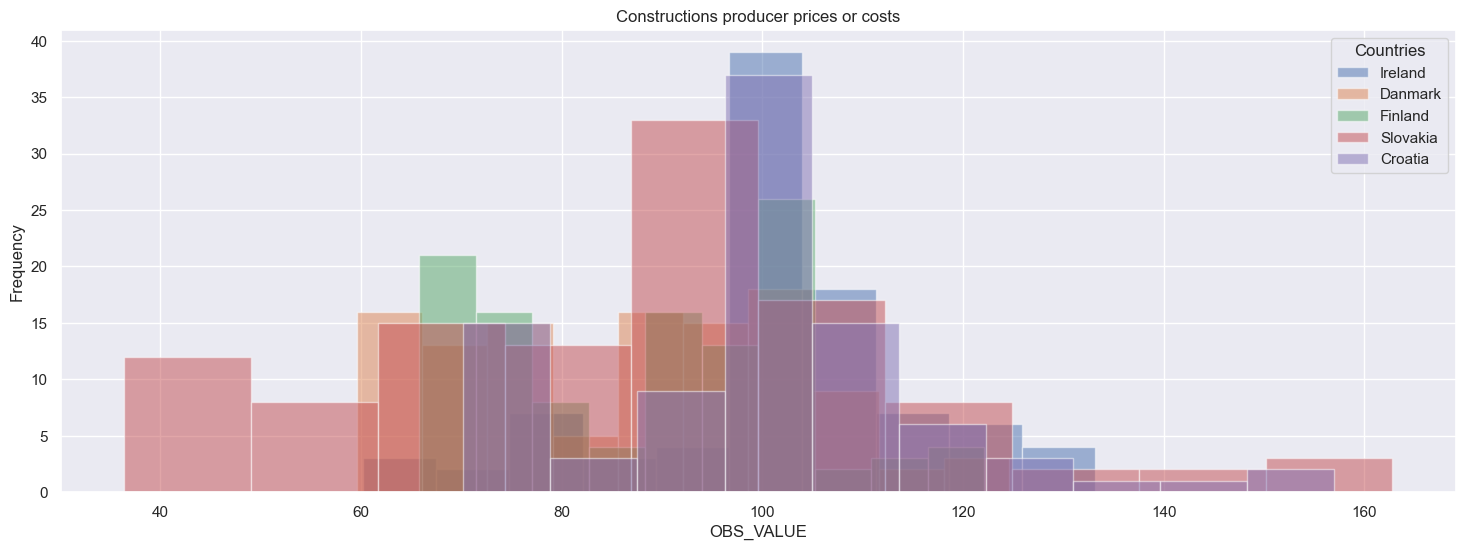

In [82]:
# Add three histograms to one plot
plt.figure(figsize=(18, 6))

plt.hist(df_ie['OBS_VALUE'], alpha=0.5, label='Ireland')
plt.hist(df_dn['OBS_VALUE'], alpha=0.5, label='Danmark')
plt.hist(df_fn['OBS_VALUE'], alpha=0.5, label='Finland')
plt.hist(df_sl['OBS_VALUE'], alpha=0.5, label='Slovakia')
plt.hist(df_cr['OBS_VALUE'], alpha=0.5, label='Croatia')


# Add plot title and axis labels
plt.title('Constructions producer prices or costs')
plt.xlabel('OBS_VALUE')
plt.ylabel('Frequency')

# Add legend
plt.legend(title='Countries')

# Display plot
plt.show()